In [44]:
import matplotlib.pyplot as plt

# Local PC
Hard ware
* i7-13700KF
* 16GB DDR6 Memory
* RTX 4090

Software
* `PLINK v1.90b7.2 64-bit (11 Dec 2023)`
* `pytorch '2.1.2.post301'`

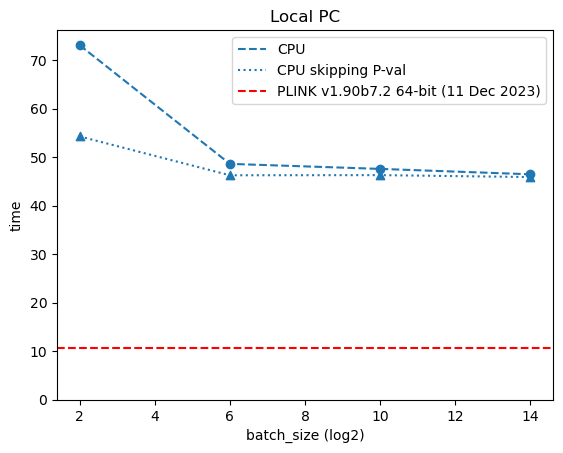

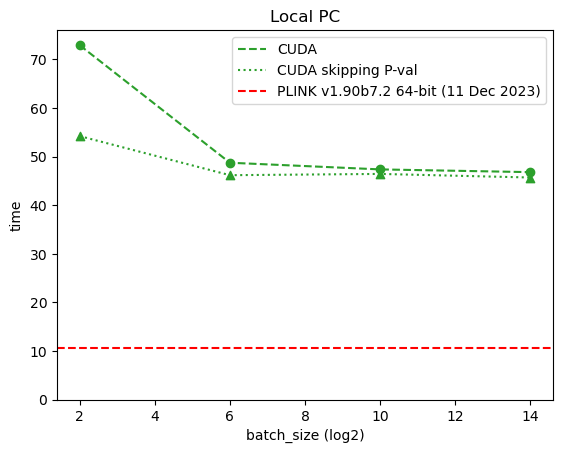

In [48]:
batch_size = [2, 6, 10, 14]
CPU_P = [73.0782,48.5969,47.5618,46.4469]
CUDA_P = [72.9471,48.745,47.3716,46.8076]
CPU_N = [54.2611,46.2464,46.2774,45.8784]
CUDA_N = [54.2315,46.1795,46.4419,45.7019]
plink = 10.607

# plot for CPU
plt.plot(batch_size, CPU_P, c="C0", linestyle="--", label="CPU")
plt.scatter(batch_size, CPU_P, c="C0")
plt.plot(batch_size, CPU_N, c="C0", linestyle=":", label="CPU skipping P-val")
plt.scatter(batch_size, CPU_N, c="C0", marker="^")
plt.axhline(y = plink, color = 'r', linestyle = '--', label="PLINK v1.90b7.2 64-bit (11 Dec 2023)")
plt.xlabel("batch_size (log2)")
plt.ylabel("time")
plt.ylim(0)
plt.legend()
plt.title("Local PC")
plt.show()
# plot for GPU
plt.plot(batch_size, CUDA_P, c="C2", linestyle="--", label="CUDA")
plt.scatter(batch_size, CUDA_P, c="C2")
plt.plot(batch_size, CUDA_N, c="C2", linestyle=":", label="CUDA skipping P-val")
plt.scatter(batch_size, CUDA_N, c="C2", marker="^")
plt.axhline(y = plink, color = 'r', linestyle = '--', label="PLINK v1.90b7.2 64-bit (11 Dec 2023)")
plt.xlabel("batch_size (log2)")
plt.ylabel("time")
plt.ylim(0)
plt.legend()
plt.title("Local PC")
plt.show()

# Data Hub
Hard ware
* AMD EPYC 7662 64-Core Processor (8 core instance)
* 16GB Memory

Software
* `PLINK v1.90b6.9 64-bit (4 Mar 2019)`
* `PLINK v1.90b7.2 64-bit (11 Dec 2023)`
* `pytorch '2.1.2.post301'`

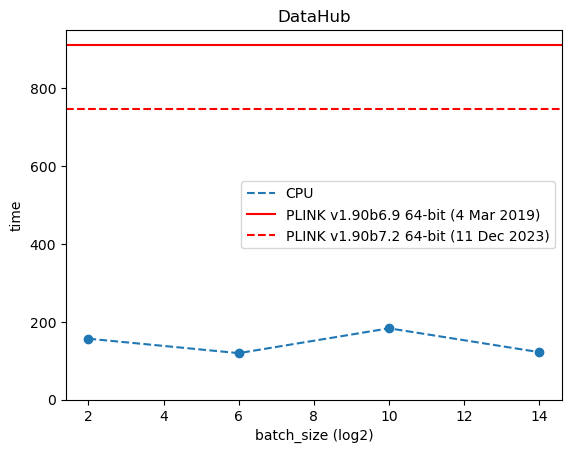

In [46]:
batch_size = [2, 6, 10, 14]
CPU = [156.5757,119.4107,183.2855,121.8914]
plink_19 = 910.86
plink_23 = 746.397

# plot for CPU
plt.plot(batch_size, CPU, c="C0", linestyle="--", label="CPU")
plt.scatter(batch_size, CPU, c="C0")
plt.axhline(y = plink_19, color = 'r', linestyle = '-', label="PLINK v1.90b6.9 64-bit (4 Mar 2019)")
plt.axhline(y = plink_23, color = 'r', linestyle = '--', label="PLINK v1.90b7.2 64-bit (11 Dec 2023)")
plt.xlabel("batch_size (log2)")
plt.ylabel("time")
plt.ylim(0)
plt.legend()
plt.title("DataHub")
plt.show()

# Conclusion
1. The performance of plink on different platforms varies greatly. 
`plink 1.9` used some Intel specific acceleration library, 
which are not supported on DataHub's AMD chips. 
`pink 2.0` have versions specificity built for Intel and AMD, 
which should help speed up calculation on DataHub.

2. There is not much difference in performance performance between my CPU and GPU implementation
The GPU has better throughput, but higher latency and extra communication cost. 
In GWAS workload, only 3 matrix operation are parallel-able, 
which is not significant enough to counter the higher latency and extra communication cost.

3. There is no close formula for CDF of t-distribution. 
So using batch operation on computing p-value can reduce total computation needed. 
However, Bigger batch size may overwhelm system memory and 
cause the total computation to be even slower 
(e.g. batch size = $2^{10}$ on DataHub). 